<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/Sharpe%26IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computing Sharpe and Information Ratio**

In [ ]:
asset_lists = [
    'SPY', # SPY -> Benchmark
    'IJR', # iShares Core S&P Small-Cap ETF
    'IVV', # iShares Core S&P 500 ETF
    'AGG', # iShares Core U.S. Aggregate Bond ETF
    'XLE', # Energy Select Sector SPDR Fund
    'XLF', # Financial Select Sector SPDR Fund
    'XLU', # Utilities Select Sector SPDR Fund
    'XLI', # Industrial Select Sector SPDR Fund
    'XLK', # Technology Select Sector SPDR Fund
    'XLV', # Health Care Select Sector SPDR Fund
    'XLP', # Consumer Staples Select Sector SPDR Fund
    'XLY', # Consumer Discretionary Select Sector SPDR Fund
    'IYR', # iShares U.S. Real Estate ETF
    'GLD', # SPDR Gold Shares
    'USO', # United States Oil Fund, LP
    'BTC-USD', # Bitcoin
]

In [ ]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,8)

# **Pulling data**

In [ ]:
data = yf.download(asset_lists)['Adj Close'].dropna()
data.head()

[*********************100%***********************]  16 of 16 completed


,AGG,BTC-USD,GLD,IJR,IVV,IYR,SPY,USO,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2014-09-17,89.697563,457.334015,117.540001,48.441830,173.461319,54.247070,172.454697,280.079987,67.812424,16.320000,46.522469,35.952534,36.574589,32.620071,56.466324,61.803387
2014-09-18,89.705856,424.440002,117.779999,48.735394,174.371338,53.852150,173.373856,276.959991,67.462051,16.479179,46.744511,36.166336,36.646919,32.384090,56.886162,62.074490
2014-09-19,89.854721,394.795990,117.089996,48.130482,174.165237,53.882534,173.217621,276.559998,67.406738,16.436102,46.699039,36.089386,36.741558,32.675980,56.948452,62.100796
2014-09-22,89.978691,402.152008,116.849998,47.618969,172.894730,53.404091,171.879898,273.519989,66.414925,16.324905,46.175671,35.847836,36.676849,32.430172,56.641251,61.230354
2014-09-23,90.061386,435.790985,117.599998,47.143051,171.941727,53.100311,170.896042,275.519989,66.220886,16.213707,45.798172,35.767330,36.353359,32.338001,56.307713,60.704464


# **Sharpe Ratio: Rolling 12-month**
* The Sharpe ratio is a simple metric of risk adjusted return.
* It is simply $S = \frac{R_p - r_f}{σ_p}$
* It determines how much risk is being taken to achieve a certain level of return in excess of the risk free rate.
* Since this is not relative to the benchmark, it cannot be used as a relative comparison.
* The next performance metric **Information Ratio** can be a better measurement when comparing to the benchmark

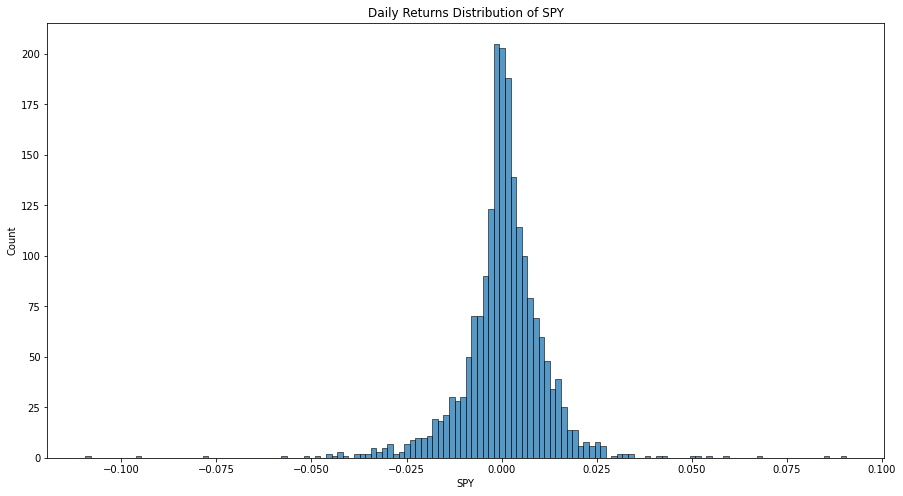

In [ ]:
# Calculate Daily Returns
daily_rets = data.pct_change()[1:]

# Plot distribution of SPY returns
plt.title('Daily Returns Distribution of SPY')
sns.histplot(daily_rets.SPY);

In [ ]:
# rolling mean returns
roll_rets = daily_rets.rolling(365).mean().dropna()
# Annualise returns
roll_rets = ((1+roll_rets)**252)-1


# rolling mean stdev
roll_stdev = daily_rets.rolling(365).std().dropna()

# annualise stdev
roll_stdev = roll_stdev*np.sqrt(252)

In [ ]:
roll_rets

,AGG,BTC-USD,GLD,IJR,IVV,IYR,SPY,USO,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2016-03-01,0.033827,0.207056,0.014040,0.013068,0.025631,0.074107,0.024982,-0.564675,-0.239152,-0.017424,0.018905,0.068495,0.128144,0.106838,0.066404,0.111914
2016-03-02,0.032979,0.246265,0.018028,0.014943,0.025044,0.085223,0.024389,-0.556293,-0.223413,-0.016572,0.016081,0.066209,0.128876,0.116384,0.062137,0.107852
2016-03-03,0.032643,0.302807,0.034415,0.031343,0.028397,0.088557,0.027804,-0.557500,-0.214805,-0.010154,0.021792,0.067776,0.130794,0.114100,0.059282,0.112043
2016-03-04,0.030556,0.263831,0.034755,0.042976,0.036080,0.097286,0.035622,-0.540562,-0.201498,-0.002731,0.032652,0.074646,0.135491,0.128558,0.061497,0.122146
2016-03-07,0.029707,0.199760,0.033726,0.058601,0.040742,0.103033,0.040295,-0.527541,-0.186809,0.001659,0.040631,0.071770,0.137586,0.135089,0.071730,0.125471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22,-0.086820,-0.429892,-0.024056,-0.084178,-0.034008,-0.025051,-0.034331,0.532751,0.511950,-0.028533,-0.068839,-0.045021,0.054884,0.121148,0.057110,-0.074124
2022-09-23,-0.088264,-0.429801,-0.032732,-0.104571,-0.042819,-0.029758,-0.043185,0.438034,0.414402,-0.043082,-0.081644,-0.046653,0.043203,0.108846,0.053451,-0.082518
2022-09-26,-0.098778,-0.432604,-0.051120,-0.115945,-0.056348,-0.059271,-0.056723,0.401042,0.398485,-0.052896,-0.090783,-0.062404,0.037983,0.082248,0.034244,-0.088467


In [ ]:
# Risk free ratio of 0
risk_free = 0

# Sharpe Ratio
sharpe_df = (roll_rets - 0) / roll_stdev

In [ ]:
sharpe_df = pd.concat([pd.DataFrame(roll_rets.iloc[-1,:].rename('mu')).T, 
           pd.DataFrame(roll_stdev.iloc[-1,:].rename('std')).T, 
           pd.DataFrame(sharpe_df.iloc[-1,:].rename('Sharpe')).T]).T

sharpe_df.sort_values('Sharpe', ascending=False)

,mu,std,Sharpe
XLE,0.442235,0.324891,1.361177
USO,0.443950,0.387942,1.144372
XLU,0.075440,0.170263,0.443081
XLV,0.039244,0.158813,0.247107
XLP,0.027965,0.147592,0.189477
XLK,-0.057879,0.257905,-0.224420
XLF,-0.050527,0.216008,-0.233912
IVV,-0.051006,0.190770,-0.267367
SPY,-0.051126,0.190557,-0.268296
XLY,-0.074511,0.276991,-0.269002


# **Information Ratio: Rolling 12-Month**

The **Information Ratio** is used to compare performance relative to a benchmark. 
* The return

$IR = \frac{R_p - R_b}{σ_(R_p - R_b)}$

In [ ]:
# Active returns = returns of asset - returns of SPY benchmark
active_returns = daily_rets.sub(daily_rets.SPY, axis=0).rolling(365).mean().dropna()

# Tracking Eror (active risk) = stdev of active returns
active_risk = daily_rets.sub(daily_rets.SPY, axis=0).rolling(365).std().dropna()

# Infromation Ratio = active returns / active risk
information_ratio = active_returns / active_risk

In [ ]:
performance_df = pd.concat([sharpe_df, 
                           active_returns.iloc[-1,:].rename('active_return').T,
                           active_risk.iloc[-1,:].rename('active_risk').T,
                            information_ratio.iloc[-1,:].rename('IR').T],axis=1)


In [ ]:
performance_df.sort_values(by='IR', ascending=False)

,mu,std,Sharpe,active_return,active_risk,IR
XLE,0.442235,0.324891,1.361177,1.662435e-03,0.019088,0.087093
USO,0.443950,0.387942,1.144372,1.667159e-03,0.025670,0.064945
XLV,0.039244,0.158813,0.247107,3.609916e-04,0.007735,0.046669
XLU,0.075440,0.170263,0.443081,4.968811e-04,0.011405,0.043568
XLP,0.027965,0.147592,0.189477,3.176845e-04,0.009212,0.034486
GLD,-0.041628,0.135827,-0.306482,3.951341e-05,0.014313,0.002761
IVV,-0.051006,0.190770,-0.267367,5.024681e-07,0.000248,0.002025
XLF,-0.050527,0.216008,-0.233912,2.502840e-06,0.007732,0.000324
XLK,-0.057879,0.257905,-0.224420,-2.833763e-05,0.006186,-0.004581
IYR,-0.061570,0.193275,-0.318559,-4.390927e-05,0.008139,-0.005395


In [ ]:
startdt = information_ratio.index[0].year
enddt = information_ratio.index[-1].year

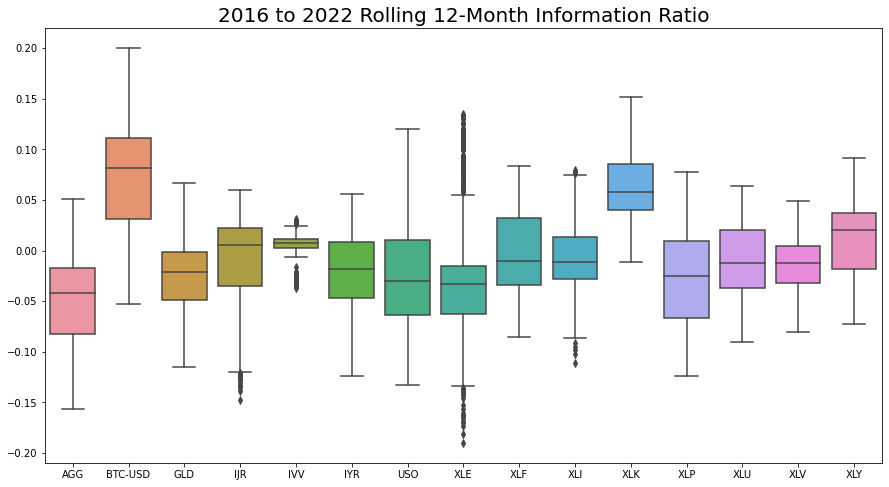

In [ ]:
plt.title(f"{startdt} to {enddt} Rolling 12-Month Information Ratio", fontsize=20)
sns.boxplot(data=information_ratio.drop('SPY',axis=1));

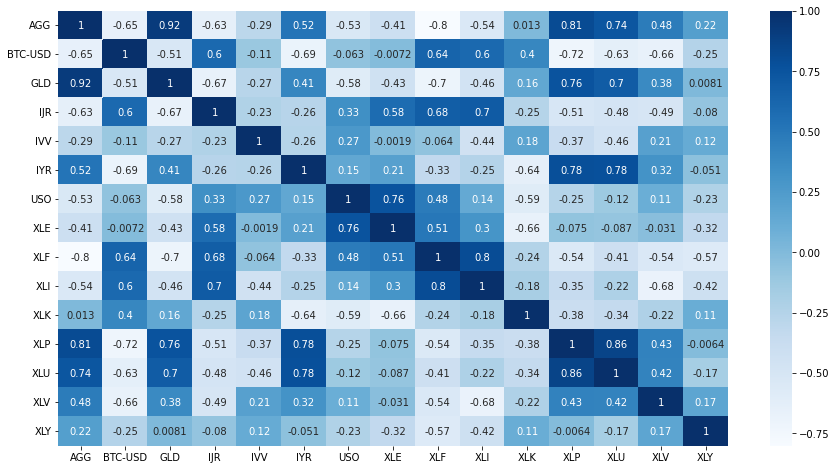

In [ ]:
sns.heatmap(data=information_ratio.drop('SPY',axis=1).corr(), annot=True, cmap='Blues');

In [ ]:
corr_df = pd.DataFrame(information_ratio.drop('SPY', axis=1).corr().unstack().drop_duplicates(), 
             columns=['Correlation'])

corr_df['+/-'] = np.sign(corr_df['Correlation'])
corr_df.Correlation = abs(corr_df.Correlation)

corr_df[corr_df.Correlation > .7].sort_values(by='Correlation', ascending=False)

Correlation  +/-
AGG     AGG     1.000000  1.0
        GLD     0.916050  1.0
XLP     XLU     0.863723  1.0
AGG     XLP     0.814467  1.0
XLF     XLI     0.804978  1.0
AGG     XLF     0.801109 -1.0
IYR     XLP     0.784926  1.0
        XLU     0.778106  1.0
GLD     XLP     0.757656  1.0
USO     XLE     0.757205  1.0
AGG     XLU     0.737875  1.0
BTC-USD XLP     0.719177 -1.0
IJR     XLI     0.702680  1.0
GLD     XLF     0.701311 -1.0

# **Skew, Kurtosis**
Instead of using technical indicators as features, we will use:
* Skewness and Kurtosis, which helps build a view of risk
* Positive Skew is preferred as it has high probability of returns of right hand side
* It also has predictable left-hand distribution of negative returns

* Kurtosis measures thickness of tails/extreme returns
* Normal distribution has Kurtosis of 3, so we calculate the Excess Kurtosis (so 0 Excess Kurtosis is normal)
* High excess kurtosis indicates high risk (thicker tails, extreme returns are more common) so when large moves happend, this can be bad if portfolio mvoes in wrong direction



In [ ]:
roll_skew = daily_rets.rolling(126).skew().dropna().add_prefix('skew_')
roll_kurt = daily_rets.rolling(126).kurt().dropna().add_prefix('kurt_')

In [ ]:
# Ridgeline Plot 
! pip install joypy

In [ ]:
from joypy import joyplot

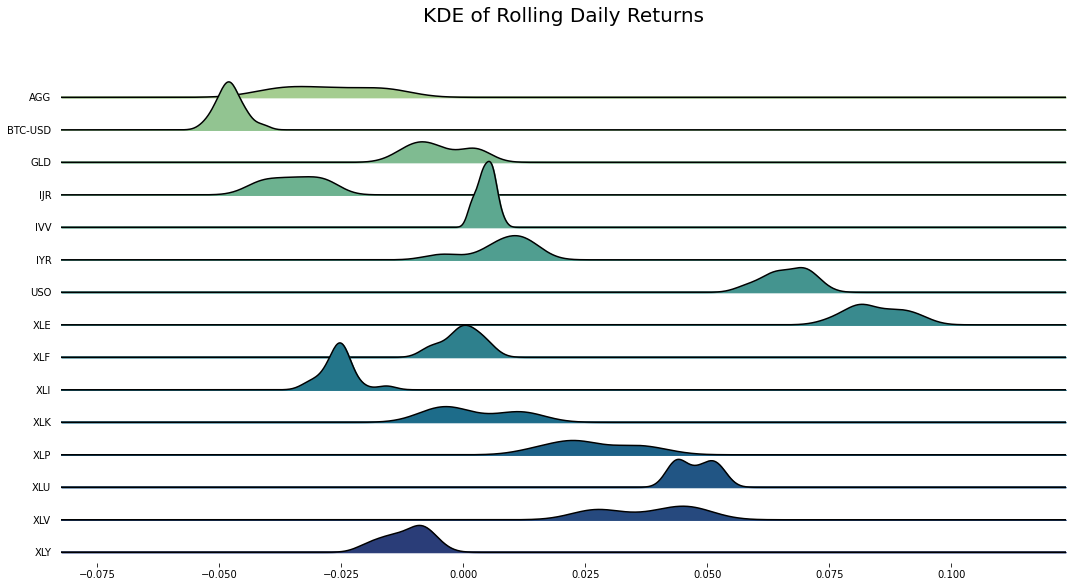

In [ ]:
joyplot(information_ratio.dropna(axis=1).last('1M'),
        colormap=sns.color_palette('crest', as_cmap=True))

plt.title('KDE of Rolling Daily Returns',
          fontsize=20)
plt.show()